<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         261 non-null    int64         
 1   Pickup point       261 non-null    object        
 2   Driver id          260 non-null    float64       
 3   Status             261 non-null    object        
 4   Request Date       261 non-null    datetime64[ns]
 5   Request Timestamp  261 non-null    object        
 6   Drop Date          261 non-null    object        
 7   Drop Timestamp     261 non-null    object        
 8   Time of Day        261 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 18.5+ KB
None
   Request id Pickup point  Driver id          Status Request Date  \
0           1         City        1.0  Trip Completed   2016-07-11   
1           3      Airport        2.0  Trip Completed   2016-07-

C:\Users\niket\AppData\Local\Temp\ipykernel_7744\3828333608.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['drop_datetime']=pd.to_datetime(df['Drop Date'].astype(str)+ ' ' +df['Drop Timestamp'].astype(str),errors='coerce')


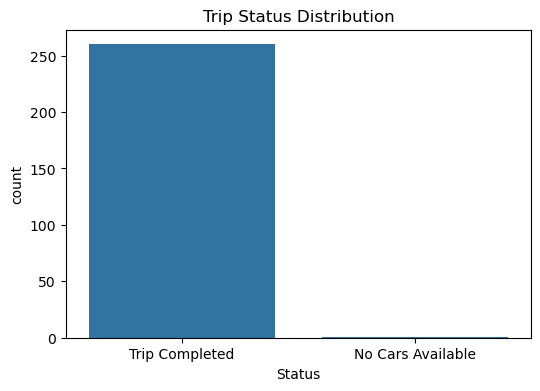

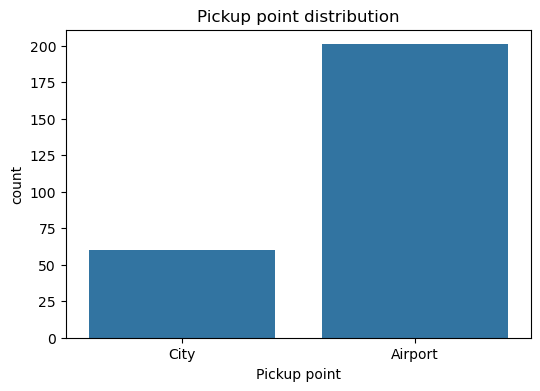

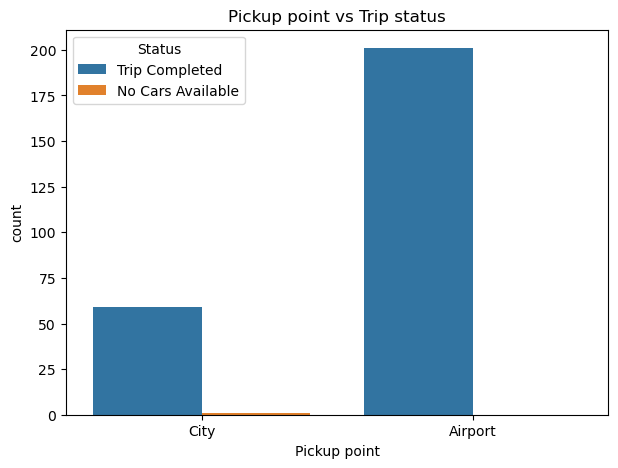

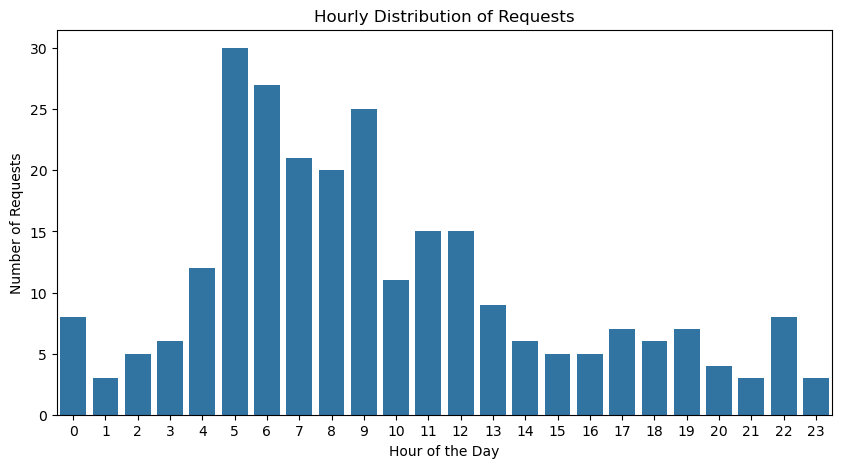

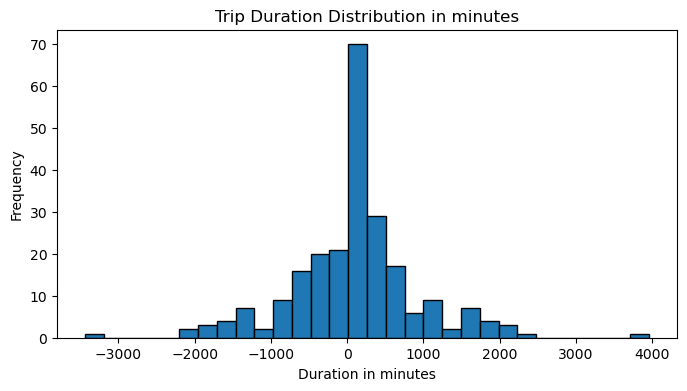


Requests Without Drivers (Likely 'No Cars Available'):

 Request id Pickup point            Status    request_datetime
       3957         City No Cars Available 2016-07-11 00:02:00

Trip Duration Summary (Only 'Trip Completed'):

Total Completed Trips: 260
Average Duration     : 87.00 mins
Min Duration         : -3434.00 mins
Max Duration         : 3955.00 mins
25th Percentile      : -279.25 mins
50th Percentile (Median): 62.50 mins
75th Percentile      : 431.00 mins


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel("Uber Request Data 2.xlsx")
df.columns=df.columns.str.strip()
print(df.info())
print(df.head())
df['request_datetime']=pd.to_datetime(df['Request Date'].astype(str)+ ' ' +df['Request Timestamp'].astype(str))
df['drop_datetime']=pd.to_datetime(df['Drop Date'].astype(str)+ ' ' +df['Drop Timestamp'].astype(str),errors='coerce')
df['trip_duration_min']=(df['drop_datetime']-df['request_datetime']).dt.total_seconds()/60
df['request_hour']=df['request_datetime'].dt.hour
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Status',order=df['Status'].value_counts().index)
plt.title("Trip Status Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Pickup point')
plt.title("Pickup point distribution")
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(data=df,x='Pickup point',hue='Status')
plt.title("Pickup point vs Trip status")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='request_hour')
plt.title("Hourly Distribution of Requests")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Requests")
plt.show()

plt.figure(figsize=(8, 4))
df[df['trip_duration_min'].notnull()]['trip_duration_min'].plot.hist(bins=30, edgecolor='black')
plt.title("Trip Duration Distribution in minutes")
plt.xlabel("Duration in minutes")
plt.show()


print("\nRequests Without Drivers (Likely 'No Cars Available'):\n")
missing_drivers = df[df['Driver id'].isnull()][['Request id', 'Pickup point', 'Status', 'request_datetime']]
print(missing_drivers.to_string(index=False))


print("\nTrip Duration Summary (Only 'Trip Completed'):\n")
completed_trips = df[df['Status'] == 'Trip Completed']
duration_stats = completed_trips['trip_duration_min'].describe()

print(f"Total Completed Trips: {len(completed_trips)}")
print(f"Average Duration     : {duration_stats['mean']:.2f} mins")
print(f"Min Duration         : {duration_stats['min']:.2f} mins")
print(f"Max Duration         : {duration_stats['max']:.2f} mins")
print(f"25th Percentile      : {duration_stats['25%']:.2f} mins")
print(f"50th Percentile (Median): {duration_stats['50%']:.2f} mins")
print(f"75th Percentile      : {duration_stats['75%']:.2f} mins")


